<h1> Naive Bayes on Arxiv Classification </h1>


<h2>1. Imports </h2>

In [8]:
# from arxivClassification import ArxivClassificationDataset as AC
import json
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from datasets import load_dataset

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import HashingVectorizer

<h2>2. Constants/FilePaths</h2>

In [9]:
NAME_DATASET = "ccdv/arxiv-classification"

# 0 is for original Math classes, 1 is for original CS classes
classConversion = [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]

<h2>3. Loading Data</h2>
<p>Hugging set dataloader and initializing HashingVectorizer</p>

In [10]:
train_data = load_dataset(NAME_DATASET, split = "train")
validation_data = load_dataset(NAME_DATASET, split = "validation")
test_data = load_dataset(NAME_DATASET, split = "test")

No config specified, defaulting to: arxiv-classification/default
Found cached dataset arxiv-classification (/Users/adityak2003/.cache/huggingface/datasets/ccdv___arxiv-classification/default/1.0.0/5ba6a83b0eb91c2ea1de914fabd462fbd17722f1a3f1a2bba29e7942a207c789)
No config specified, defaulting to: arxiv-classification/default
Found cached dataset arxiv-classification (/Users/adityak2003/.cache/huggingface/datasets/ccdv___arxiv-classification/default/1.0.0/5ba6a83b0eb91c2ea1de914fabd462fbd17722f1a3f1a2bba29e7942a207c789)
No config specified, defaulting to: arxiv-classification/default
Found cached dataset arxiv-classification (/Users/adityak2003/.cache/huggingface/datasets/ccdv___arxiv-classification/default/1.0.0/5ba6a83b0eb91c2ea1de914fabd462fbd17722f1a3f1a2bba29e7942a207c789)


<h2>4. Data Processing </h2>

<h3>a. Converting 11 original classes to 2 classes, CS (1) or Math (0) </h3>

In [11]:
train_y = [classConversion[x] for x in train_data['label']]
test_y = [classConversion[x] for x in test_data['label']]
validation_y = [classConversion[x] for x in validation_data['label']]

<h3>b. Fit and transform vectorizer to train_data </h3>

In [14]:
vectorizer = HashingVectorizer(n_features=500)

train_X = vectorizer.fit_transform(train_data['text'])
test_X = vectorizer.transform(test_data['text'])
validation_X = vectorizer.transform(validation_data['text'])

<h2>5. Training Gaussian Naive Bayes model </h2

In [15]:
gnb = GaussianNB()
gnb.fit(train_X.toarray(), train_y)

GaussianNB()

<h2>6. Scoring accurraccies</h2>

<h3>a. Training accurracy score </h3>

In [16]:
training_accurracy = gnb.score(train_X.toarray(), train_y)
print(f"Accurracy train data points: {training_accurracy}")

Accurracy train data points: 0.8723051993800197


<h3>b. Validation accurracy score </h3>

In [17]:
validation_accurracy_score = gnb.score(validation_X.toarray(), validation_y)
print(f"Accurracy on validation: {validation_accurracy_score}")

Accurracy on validation: 0.8764


<h2>7. Varying feature numbers for hashing vectorizer </h2>

<h3>a. Number of features and accurraccy results</h3>

In [18]:
features = [10, 50, 100, 200, 500, 1000, 2000]
training_accurracy = []
validation_accurracy = []

<h3>b. Cycling through features to score accurracies of different hashingvecotr feature sizes
</h3>
Note: Takes about 20 minutes to run and drains a lot of battery

In [19]:

for vectorSize in features:
    
    vectorizer = HashingVectorizer(n_features=vectorSize)
    
    # Fit to vectorizer
    train_X = vectorizer.fit_transform(train_data['text'])
    validation_X = vectorizer.transform(validation_data['text'])
    
    # Train Model
    gnb = GaussianNB()
    gnb.fit(train_X.toarray(), train_y)
    
    # Append accurracies
    training_accurracy.append(gnb.score(train_X.toarray(), train_y))
    validation_accurracy.append(gnb.score(validation_X.toarray(), validation_y))
    
    print(f"Finished feature size: {vectorSize}")
    

Finished feature size: 10
Finished feature size: 50
Finished feature size: 100
Finished feature size: 200
Finished feature size: 500
Finished feature size: 1000
Finished feature size: 2000


<h3>c. generate graphs with matplotlib </h3>


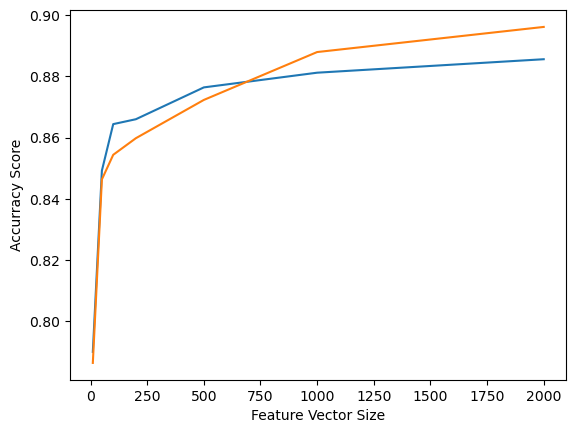

In [20]:
import matplotlib.pyplot as plt

plt.plot(features, validation_accurracy)
plt.plot(features, training_accurracy)
plt.ylabel("Accurracy Score")
plt.xlabel("Feature Vector Size")

plt.show()

# Best results when the vectorizer only has 10 features * I THINK * for some reason


<h3>d. Testing using feature size of 10</h3>

In [21]:
vectorizer = HashingVectorizer(n_features=100)
    
# Fit to vectorizer
train_X = vectorizer.fit_transform(train_data['text'])
test_X = vectorizer.transform(test_data['text'])

# Train Model
gnb = GaussianNB()
gnb.fit(train_X.toarray(), train_y)

# Testing accurracies
test_accurracy = gnb.score(test_X.toarray(), test_y)

print(f"Final test accurracy: {test_accurracy}")

Final test accurracy: 0.8628
